In [1]:
%ls

sample_data/


In [2]:
%pip install pandas seaborn scikit-learn


In [5]:
import pandas as pd
import seaborn as sns



In [6]:
df = pd.read_csv("penguins_lter.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [7]:
df_pg= df[["Species","Island","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)","Sex"]]
df_pg.columns = df_pg.columns.map(lambda x: x.lower().replace(' ', '_'))
df_pg.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   species              344 non-null    object 
 1   island               344 non-null    object 
 2   culmen_length_(mm)   342 non-null    float64
 3   culmen_depth_(mm)    342 non-null    float64
 4   flipper_length_(mm)  342 non-null    float64
 5   body_mass_(g)        342 non-null    float64
 6   sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


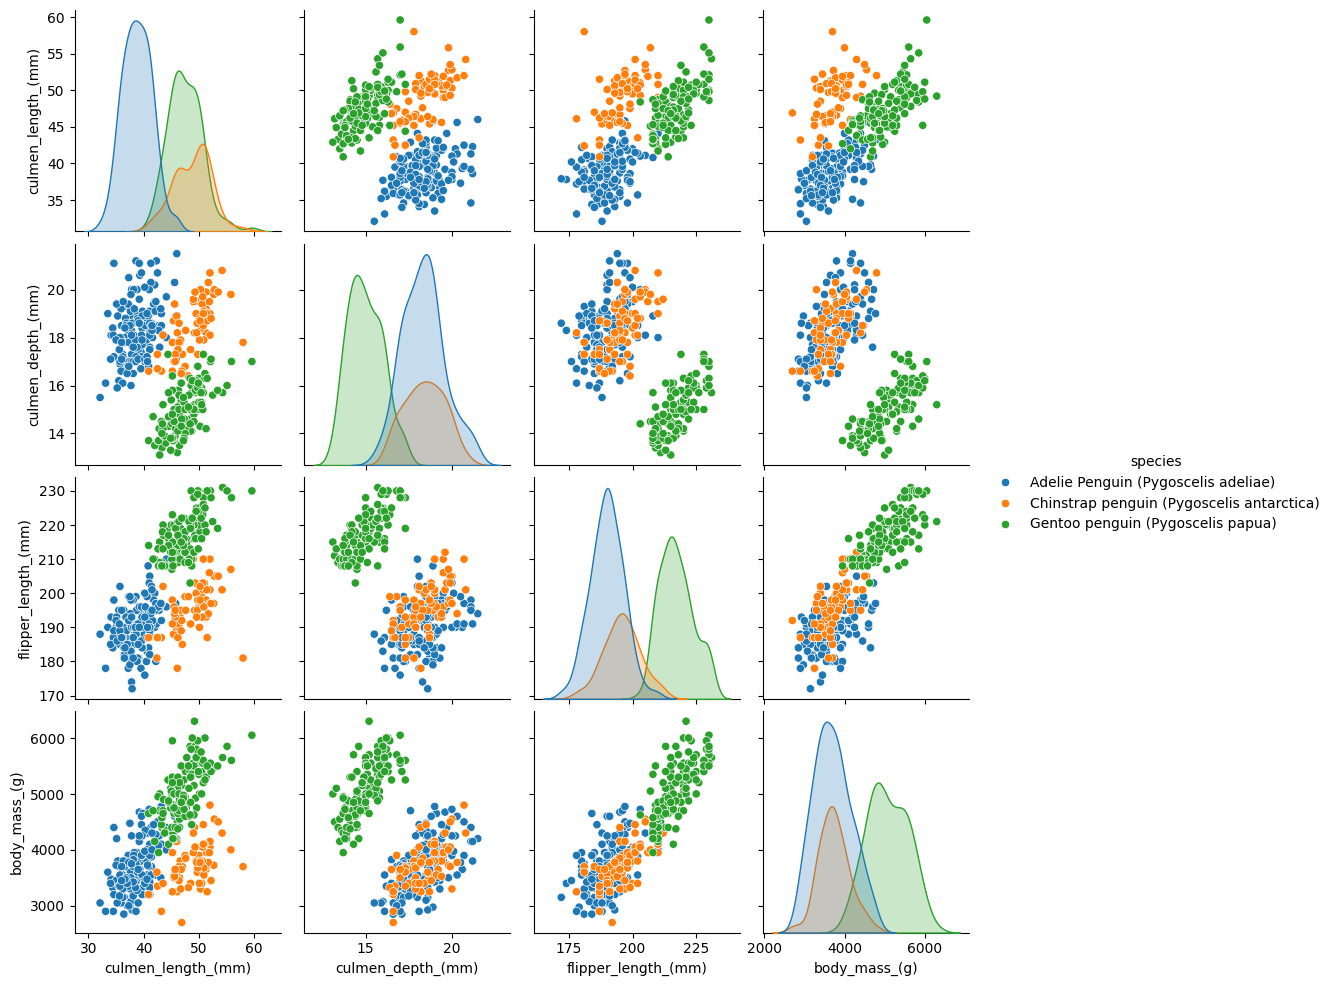

In [8]:
#explorar nuevo dataframe
sns.pairplot(df_pg, hue="species")

# **Limpiesa y tranformacon de datos**

In [9]:
# eliminar nulos
df_pg.dropna(inplace=True)
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   species              334 non-null    object 
 1   island               334 non-null    object 
 2   culmen_length_(mm)   334 non-null    float64
 3   culmen_depth_(mm)    334 non-null    float64
 4   flipper_length_(mm)  334 non-null    float64
 5   body_mass_(g)        334 non-null    float64
 6   sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


<ipython-input-9-954e4ead10fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pg.dropna(inplace=True)


In [10]:
df_pg_encoded = pd.get_dummies(df_pg, columns=["island", "sex"], drop_first=False)
df_pg_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   species              334 non-null    object 
 1   culmen_length_(mm)   334 non-null    float64
 2   culmen_depth_(mm)    334 non-null    float64
 3   flipper_length_(mm)  334 non-null    float64
 4   body_mass_(g)        334 non-null    float64
 5   island_Biscoe        334 non-null    uint8  
 6   island_Dream         334 non-null    uint8  
 7   island_Torgersen     334 non-null    uint8  
 8   sex_.                334 non-null    uint8  
 9   sex_FEMALE           334 non-null    uint8  
 10  sex_MALE             334 non-null    uint8  
dtypes: float64(4), object(1), uint8(6)
memory usage: 17.6+ KB


In [11]:
df_pg_encoded.head()

,species,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,0,0,1,0,1,0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,0,0,1,0,1,0
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,0,0,1,0,1,0
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,0,0,1,0,0,1


In [12]:
df_pg_encoded=df_pg_encoded.drop("sex_.", axis=1)

# **separar datos en feactures y target**
dividimos los datos y los separamos en datos de entreamaiento y datos de pruebas , 80_20


In [14]:
#separa datos en los feactures y en los target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df_pg_encoded.drop("species", axis=1)
y = df_pg_encoded["species"]



traformar el target en variables numericas


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# **Inicia Busqueda de modelo**


In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")



Accuracy: 0.9900990099009901
Confusion Matrix:
[[49  0  0]
 [ 1 17  0]
 [ 0  0 34]]


In [ ]:
# Ejemplo de predicción para una nueva instancia
new_instance = X_test.iloc[[0]]
prediction = model.predict(new_instance)

print(f"Predicted Species: {prediction[0]}")


Predicted Species: Adelie
